In [49]:
## INPUT
name="DescentIntoFuckery"

In [50]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime
%matplotlib inline
file = open("players/players_"+name+".txt", "r")
contents = file.read()
players = ast.literal_eval(contents)
file.close()
plyrs=list(set(players.values()))
print("Named in player File:",plyrs)
print("Appearing in Data:",pd.read_csv("rolls_"+name+".csv",sep=";")["Player"].unique())

Named in player File: ['Smallfolk', 'Bethrynne', 'Kallistē']
Appearing in Data: ['Smallfolk' 'Kallistē' 'Bethrynne' 'Bandit' 'Bandit Captain'
 'Fist of Bane' 'Iron Consul' 'Necromite of Myrkul' 'Master of Souls'
 'Skeletal Rats' 'Reaper of Bhaal' "Death's Head of Bhaal" 'Noble'
 'Cultist' 'Philaster Fisk' 'Amrik Vanthampur' 'Veteran' 'Helmed Horror'
 'Spined Devil' 'Guard' 'Tressym' 'Duke Thalamra Vanthampur'
 'Slobberchops' 'Klim Jhasso' 'Reya Mantlemorn' 'Barbed Devil']


Select the Players and NPCs you want to include in the plots:

In [51]:
override=True
plotplyrs=['Smallfolk','Kallistē','Bethrynne','Slobberchops','Klim Jhasso','Reya Mantlemorn'] if override else plyrs
print(plotplyrs)

['Smallfolk', 'Kallistē', 'Bethrynne', 'Slobberchops', 'Klim Jhasso', 'Reya Mantlemorn']


In [52]:
skill_labels=['ACROBATICS',
 'ANIMAL HANDLING',
 'ARCANA',
 'ATHLETICS',
 'DECEPTION',
 'HISTORY',
 'INSIGHT',
 'INTIMIDATION',
 'INVESTIGATION',
 'MEDICINE',
 'NATURE',
 'PERCEPTION',
 'PERFORMANCE',
 'PERSUASION',
 'RELIGION',
 'SLEIGHT OF HAND',
 'STEALTH',
 'SURVIVAL']

attr_labels=['STRENGTH',
 'DEXTERITY',
 'CONSTITUTION',
 'INTELLIGENCE',
 'WISDOM',
 'CHARISMA']

save_labels=['STRENGTH SAVE',
 'DEXTERITY SAVE',
 'CONSTITUTION SAVE',
 'INTELLIGENCE SAVE',
 'WISDOM SAVE',
 'CHARISMA SAVE',
 'DEATH SAVE']

df=pd.read_csv("rolls_"+name+".csv",sep=";")
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
df["Day"]=pd.to_datetime(df["Day"])

#df=df[(df["Day"]=="2021-02-23")|(df["Day"]=="2021-02-24")]
#df=df[df["Player"]=="Smallfolk"]
npcs=df[df["Player"].isin(plotplyrs)==False]
df=df[df["Player"].isin(plotplyrs)]

skills=df[df["Type"]=="Skill"].rename(columns={"Skill/Weapon/Spell": "Skill"})
attacks=df[df["Type"]=="Attack"].rename(columns={"Skill/Weapon/Spell": "Weapon/Spell"})
saves=df[df["Type"]=="Save"].rename(columns={"Skill/Weapon/Spell": "Save"})
other=df[df["Type"]=="Other"].rename(columns={"Skill/Weapon/Spell": "Skill"})

plyr_labels=plotplyrs

df

,Player,NPC,Timestamp,Skill/Weapon/Spell,Result,Raw,Plus,Final,Type,Day
0,Smallfolk,0,2021-01-03 19:36:00,STEALTH,25,19,6,1.0,Skill,2021-03-01
1,Kallistē,0,2021-01-03 19:38:00,DECEPTION,20,17,3,1.0,Skill,2021-03-01
2,Kallistē,0,2021-01-03 19:38:00,DECEPTION,11,8,3,0.0,Skill,2021-03-01
3,Bethrynne,0,2021-01-03 19:50:00,HISTORY,8,2,6,1.0,Skill,2021-03-01
4,Smallfolk,0,2021-01-03 19:50:00,HISTORY,12,12,0,1.0,Skill,2021-03-01
...,...,...,...,...,...,...,...,...,...,...
1089,Kallistē,0,2021-03-14 23:33:00,PERSUASION,22,14,8,1.0,Skill,2021-03-14
1090,Kallistē,0,2021-03-14 23:33:00,INSIGHT,6,4,2,1.0,Skill,2021-03-14
1091,Bethrynne,0,2021-03-14 23:38:00,INSIGHT,11,9,2,1.0,Skill,2021-03-14
1092,Kallistē,0,2021-03-14 23:39:00,PERSUASION,17,9,8,1.0,Skill,2021-03-14


## Skillchecks

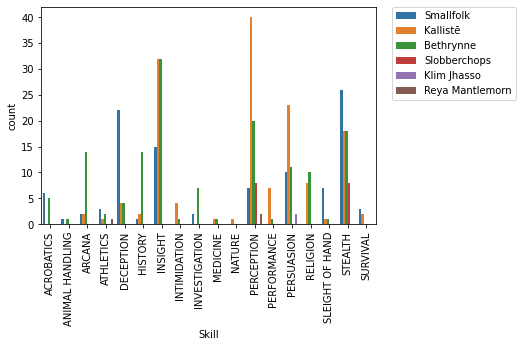

In [53]:
ax = sns.countplot(x="Skill", hue="Player", data=skills[skills["Final"]==1], order=skill_labels,hue_order=plyr_labels)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Count of skillchecks per month and player

In [ ]:
#skills['Timestamp'].groupby([skills.Timestamp.dt.year, skills.Timestamp.dt.month, skills.Player,df.Final]).agg('count')

Average plusses on skillchecks

## Distribution of rolls

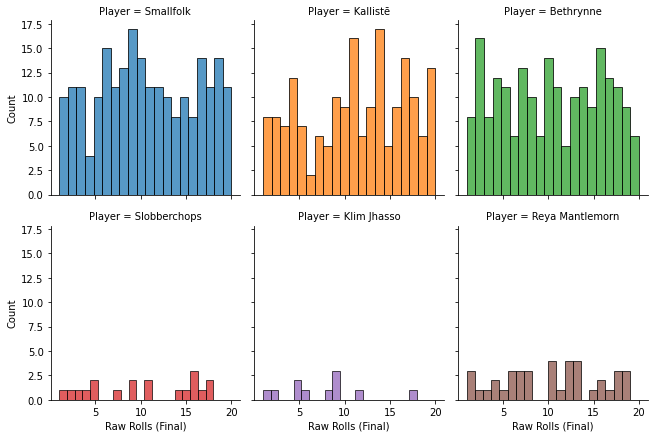

In [54]:
g = sns.FacetGrid(df[df["Final"]==1],col="Player",hue="Player",col_wrap=3,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("Raw Rolls (Final)", "Count")

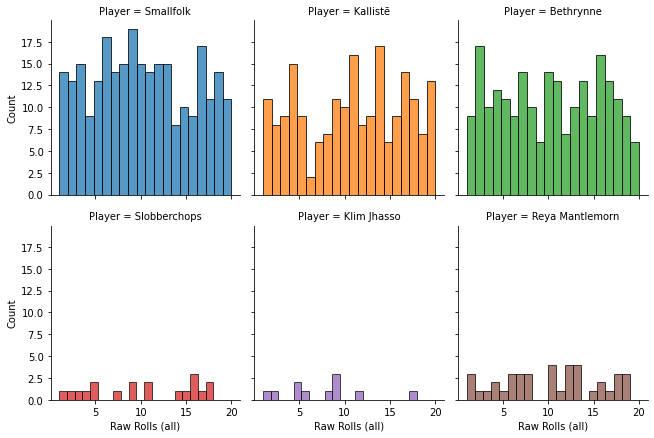

In [55]:
g = sns.FacetGrid(df,col="Player",hue="Player",col_wrap=3,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("Raw Rolls (all)", "Count")

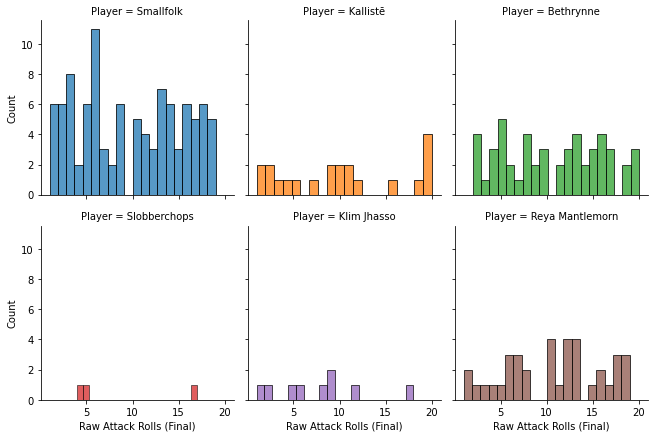

In [56]:
g = sns.FacetGrid(attacks[attacks["Final"]==1],col="Player",hue="Player",col_wrap=3,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("Raw Attack Rolls (Final)", "Count")

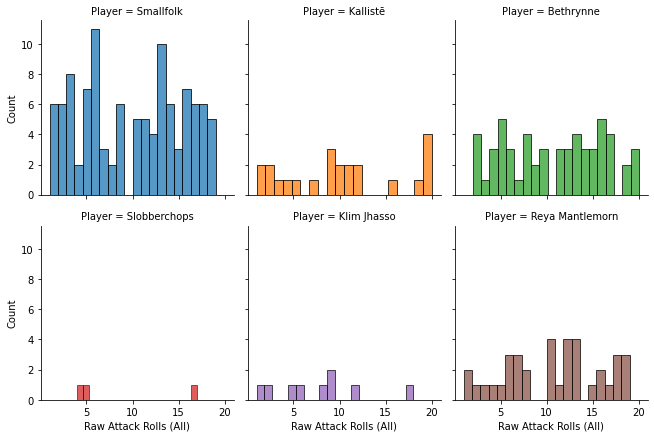

In [57]:
g = sns.FacetGrid(attacks,col="Player",hue="Player",col_wrap=3,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("Raw Attack Rolls (All)", "Count")

In [58]:
df['Raw'].groupby([df.Player]).agg('mean')

Player
Bethrynne          10.237443
Kallistē           10.898990
Klim Jhasso         7.636364
Reya Mantlemorn    10.250000
Slobberchops       10.368421
Smallfolk          10.189591
Name: Raw, dtype: float64

In [59]:
df['Raw'].groupby([df.Player]).agg('std')

Player
Bethrynne          5.718012
Kallistē           5.834424
Klim Jhasso        4.738623
Reya Mantlemorn    5.480735
Slobberchops       5.851975
Smallfolk          5.636810
Name: Raw, dtype: float64

## Crits

In [60]:
crits20=df[(df["Raw"]==20)]
crits1=df[(df["Raw"]==1)]

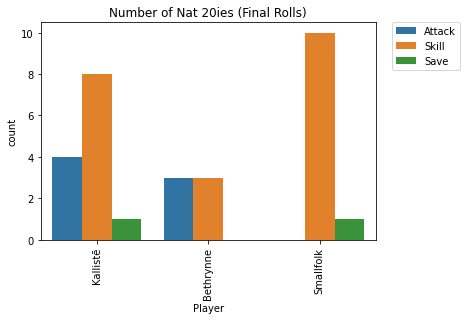

In [61]:
ax = sns.countplot(x="Player",hue="Type", data=crits20[crits20["Final"]==1])
plt.xticks(rotation=90)
plt.title("Number of Nat 20ies (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

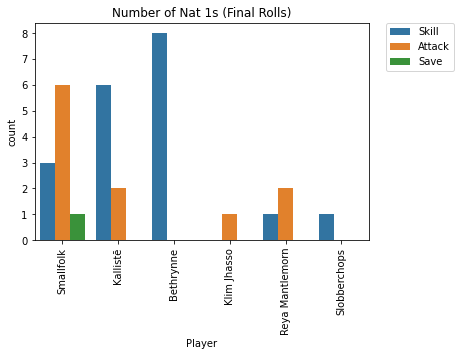

In [62]:
ax = sns.countplot(x="Player",hue="Type", data=crits1[crits1["Final"]==1])
plt.xticks(rotation=90)
plt.title("Number of Nat 1s (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Saves

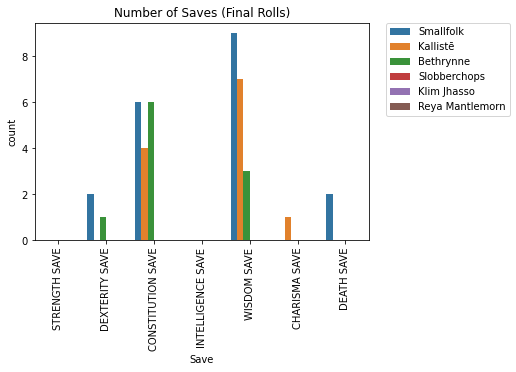

In [63]:
ax = sns.countplot(x="Save",hue="Player", data=saves[saves["Final"]==1],hue_order=plyr_labels,order=save_labels)
plt.xticks(rotation=90)
plt.title("Number of Saves (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Times

In [64]:
#df[["Timestamp"]].groupby([df["Day"]]).agg(lambda x: max(x.Timestamp)-min(x.Timestamp))

In [65]:
times=df[["Timestamp"]].groupby([df["Day"]]).agg(lambda x: max(x.Timestamp)-min(x.Timestamp))
len(times[times.Timestamp>datetime.timedelta(hours=2)])

10

## Attacks

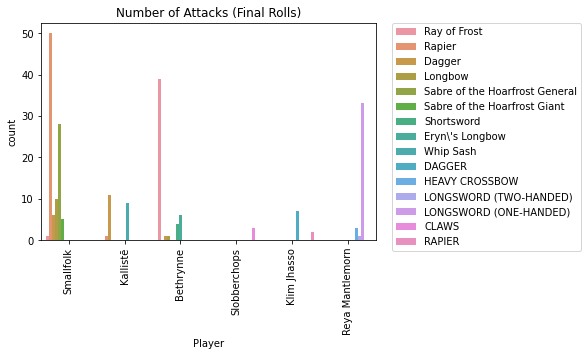

In [66]:
ax = sns.countplot(x="Player",hue="Weapon/Spell", data=attacks[attacks["Final"]==1],order=plyr_labels)
plt.xticks(rotation=90)
plt.title("Number of Attacks (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

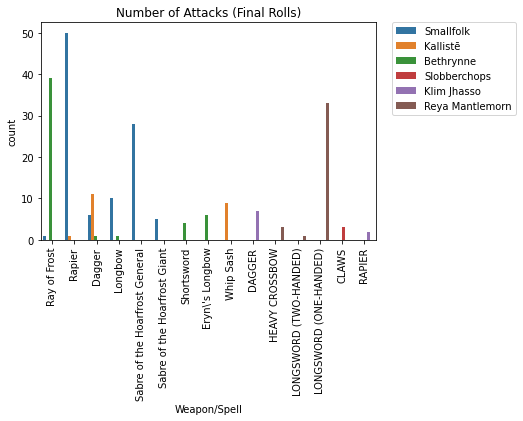

In [67]:
ax = sns.countplot(x="Weapon/Spell",hue="Player", data=attacks[attacks["Final"]==1],hue_order=plyr_labels)
plt.xticks(rotation=90)
plt.title("Number of Attacks (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## NPCs

(array([20., 23., 14., 15., 20., 13., 18., 16., 12., 16., 23., 16., 20.,
        21.,  9., 18., 21., 16., 16., 11.]),
 array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
         9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
        18.1 , 19.05, 20.  ]),
 <BarContainer object of 20 artists>)

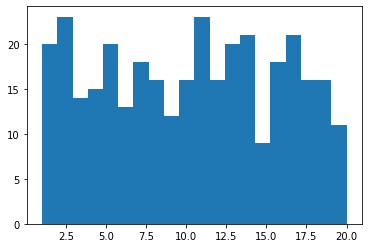

In [71]:
plt.hist(npcs["Raw"],bins=20)

In [72]:
npcs["Raw"].mean()

10.233727810650887